# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('C1.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,"dari saya sendiri terdapat jadwal, namun saya ...",P
1,tergantung situasi,P
2,Lebih fleksibel bergantung pada situasi,P
3,Cuman bilang ke temen² aku pen kesini blalala,P
4,fleksibel bergantung pada situasi,P
...,...,...
87,tersusun rapi,J
88,Terjadwal agar tidak berantakan semua kegiatan...,J
89,saya lebih fleksibel bergantung pada situasi k...,P
90,"membuat jadwal terlebih dahulu, jika ada sesua...",J


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,92,92
unique,82,2
top,Bergantung pada situasi,P
freq,4,65


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
J,27
P,65


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('situasi', 57),
 ('pada', 43),
 ('fleksibel', 37),
 ('bergantung', 33),
 ('saya', 32),
 ('jadwal', 30),
 ('yang', 29),
 ('lebih', 24),
 ('membuat', 19),
 ('Saya', 14),
 ('akan', 13),
 ('dan', 13),
 ('rapi', 12),
 ('tidak', 12),
 ('tergantung', 11),
 ('dengan', 10),
 ('tersusun', 10),
 ('hari', 9),
 ('kita', 9),
 ('ada', 8),
 ('tersebut', 8),
 ('kegiatan', 8),
 ('jika', 8),
 ('namun', 7),
 ('Bergantung', 7),
 ('maka', 7),
 ('juga', 6),
 ('Lebih', 6),
 ('terkadang', 6),
 ('Fleksibel', 5),
 ('karena', 5),
 ('cenderung', 5),
 ('jadwal,', 4),
 ('menyesuaikan', 4),
 ('ke', 4),
 ('jadi', 4),
 ('harus', 4),
 ('biasanya', 4),
 ('apa', 4),
 ('itu', 4),
 ('Membuat', 4),
 ('tetapi', 4),
 ('terjadi', 3),
 ('aku', 3),
 ('mengikuti', 3),
 ('sering', 3),
 ('suka', 3),
 ('tapi', 3),
 ('tau', 3),
 ('saja', 3),
 ('untuk', 3),
 ('situasi,', 3),
 ('sudah', 3),
 ('kalau', 3),
 ('dalam', 3),
 ('beberapa', 3),
 ('dapat', 3),
 ('saat', 3),
 ('di', 3),
 ('menjadi', 3),
 ('semua', 3),
 ('dari', 2),
 ('sendiri'

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,"dari saya sendiri terdapat jadwal, namun saya ..."
1,tergantung situasi
2,lebih fleksibel bergantung pada situasi
3,cuman bilang ke temen² aku pen kesini blalala
4,fleksibel bergantung pada situasi
...,...
87,tersusun rapi
88,terjadwal agar tidak berantakan semua kegiatan...
89,saya lebih fleksibel bergantung pada situasi k...
90,"membuat jadwal terlebih dahulu, jika ada sesua..."


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Indikator,Tipe,Indikator_clean,Indikator_tokens
0,"dari saya sendiri terdapat jadwal, namun saya ...",P,dari saya sendiri terdapat jadwal namun saya j...,"[dari, saya, sendiri, terdapat, jadwal, namun,..."
1,tergantung situasi,P,tergantung situasi,"[tergantung, situasi]"
2,lebih fleksibel bergantung pada situasi,P,lebih fleksibel bergantung pada situasi,"[lebih, fleksibel, bergantung, pada, situasi]"
3,cuman bilang ke temen² aku pen kesini blalala,P,cuman bilang ke temen aku pen kesini blalala,"[cuman, bilang, ke, temen, aku, pen, kesini, b..."
4,fleksibel bergantung pada situasi,P,fleksibel bergantung pada situasi,"[fleksibel, bergantung, pada, situasi]"
...,...,...,...,...
87,tersusun rapi,J,tersusun rapi,"[tersusun, rapi]"
88,terjadwal agar tidak berantakan semua kegiatan...,J,terjadwal agar tidak berantakan semua kegiatan...,"[terjadwal, agar, tidak, berantakan, semua, ke..."
89,saya lebih fleksibel bergantung pada situasi k...,P,saya lebih fleksibel bergantung pada situasi k...,"[saya, lebih, fleksibel, bergantung, pada, sit..."
90,"membuat jadwal terlebih dahulu, jika ada sesua...",J,membuat jadwal terlebih dahulu jika ada sesuat...,"[membuat, jadwal, terlebih, dahulu, jika, ada,..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [dari, saya, sendiri, terdapat, jadwal, namun,...
1                                [tergantung, situasi]
2        [lebih, fleksibel, bergantung, pada, situasi]
3    [cuman, bilang, ke, temen, saya, pen, kesini, ...
4               [fleksibel, bergantung, pada, situasi]
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","dan","yang"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0     [dari, sendiri, terdapat, jadwal, namun, juga,...
1                                 [tergantung, situasi]
2         [lebih, fleksibel, bergantung, pada, situasi]
3      [cuman, bilang, ke, temen, pen, kesini, blalala]
4                [fleksibel, bergantung, pada, situasi]
                            ...                        
87                                     [tersusun, rapi]
88    [terjadwal, agar, tidak, berantakan, semua, ke...
89    [lebih, fleksibel, bergantung, pada, situasi, ...
90    [membuat, jadwal, terlebih, dahulu, jika, ada,...
91    [dua, duanya, juga, sih, karena, kita, gatau, ...
Name: indikator_filter, Length: 92, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00
dari sendiri dapat jadwal namun juga sesuai dengan situasi jadi
gantung situasi
lebih fleksibel gantung pada situasi
cuman bilang ke temen pen kesini blalala
fleksibel gantung pada situasi
jalan hari tanpa jadwal hanya ikut alur ada
masih pikir
susun jadwal dengan rapi
lebih fleksibel terganrung pada situasi sedang hadap
akan lebih pilih ikut situasi karena lebih sering temu situasi tidak sesuai rencana jadi lebih efektif sesuai dengan situasi
lebih fleksibel gantung pada situasi kondisi
fleksibel gantung pada situasi
lebih fleksibel gantung pada situasi
sendiri gantung pada situasi
gantung pada situasi
gantung pada situasi
gantung pada situasi terkadang hari sebut banyak pr maka akan selesai sampai tuntas
fleksibel
buat jadwal karena orang tidak suka ubah jadwal dadak
lebih ke fleksibel
gantung pada situasi hari sebut
tata waktu dengan baik atau kita buat schedule harus penuh pada hari sebut
gantung juga

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[dari, saya, sendiri, terdapat, jadwal, namun,...","[dari, sendiri, terdapat, jadwal, namun, juga,...","[dari, sendiri, dapat, jadwal, namun, juga, se..."
1,"[tergantung, situasi]","[tergantung, situasi]","[gantung, situasi]"
2,"[lebih, fleksibel, bergantung, pada, situasi]","[lebih, fleksibel, bergantung, pada, situasi]","[lebih, fleksibel, gantung, pada, situasi]"
3,"[cuman, bilang, ke, temen, saya, pen, kesini, ...","[cuman, bilang, ke, temen, pen, kesini, blalala]","[cuman, bilang, ke, temen, pen, kesini, blalala]"
4,"[fleksibel, bergantung, pada, situasi]","[fleksibel, bergantung, pada, situasi]","[fleksibel, gantung, pada, situasi]"
...,...,...,...
87,"[tersusun, rapi]","[tersusun, rapi]","[susun, rapi]"
88,"[terjadwal, agar, tidak, berantakan, semua, ke...","[terjadwal, agar, tidak, berantakan, semua, ke...","[jadwal, agar, tidak, beranta, semua, giat, se..."
89,"[saya, lebih, fleksibel, bergantung, pada, sit...","[lebih, fleksibel, bergantung, pada, situasi, ...","[lebih, fleksibel, gantung, pada, situasi, kec..."
90,"[membuat, jadwal, terlebih, dahulu, jika, ada,...","[membuat, jadwal, terlebih, dahulu, jika, ada,...","[buat, jadwal, lebih, dahulu, jika, ada, sesua..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,"dari saya sendiri terdapat jadwal, namun saya ...",P,dari saya sendiri terdapat jadwal namun saya j...,"[dari, saya, sendiri, terdapat, jadwal, namun,...","[dari, saya, sendiri, terdapat, jadwal, namun,...","[dari, sendiri, terdapat, jadwal, namun, juga,...",dari sendiri dapat jadwal namun juga sesuai de...,"[dari, sendiri, dapat, jadwal, namun, juga, se..."
1,tergantung situasi,P,tergantung situasi,"[tergantung, situasi]","[tergantung, situasi]","[tergantung, situasi]",gantung situasi,"[gantung, situasi]"
2,lebih fleksibel bergantung pada situasi,P,lebih fleksibel bergantung pada situasi,"[lebih, fleksibel, bergantung, pada, situasi]","[lebih, fleksibel, bergantung, pada, situasi]","[lebih, fleksibel, bergantung, pada, situasi]",lebih fleksibel gantung pada situasi,"[lebih, fleksibel, gantung, pada, situasi]"
3,cuman bilang ke temen² aku pen kesini blalala,P,cuman bilang ke temen aku pen kesini blalala,"[cuman, bilang, ke, temen, aku, pen, kesini, b...","[cuman, bilang, ke, temen, saya, pen, kesini, ...","[cuman, bilang, ke, temen, pen, kesini, blalala]",cuman bilang ke temen pen kesini blalala,"[cuman, bilang, ke, temen, pen, kesini, blalala]"
4,fleksibel bergantung pada situasi,P,fleksibel bergantung pada situasi,"[fleksibel, bergantung, pada, situasi]","[fleksibel, bergantung, pada, situasi]","[fleksibel, bergantung, pada, situasi]",fleksibel gantung pada situasi,"[fleksibel, gantung, pada, situasi]"


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

92

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
1,"(0, 69)\t0.2951289161111879\n (0, 155)\t0.1..."
1,"(0, 52)\t0.7358812192907449\n (0, 155)\t0.6..."
1,"(0, 118)\t0.4441620984731332\n (0, 48)\t0.4..."
1,"(0, 25)\t0.3875743846083548\n (0, 83)\t0.38..."
1,"(0, 118)\t0.5356650058205191\n (0, 48)\t0.5..."
...,...
0,"(0, 130)\t0.7071067811865476\n (0, 159)\t0...."
0,"(0, 20)\t0.4471789271043457\n (0, 3)\t0.409..."
1,"(0, 121)\t0.36684631758633107\n (0, 1)\t0.3..."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(69, 187) (69,) (23, 187) (23,)


# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

accuracies = {

}

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(0.9855072463768116, 0.8260869565217391)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9710144927536232, 0.8695652173913043)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(0.9855072463768116, 0.782608695652174)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.927536231884058, 0.782608695652174)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.9130434782608695, 0.7391304347826086)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(0.9855072463768116, 0.8695652173913043)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9420289855072463, 0.8695652173913043)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
KNN,82.27
SGD,79.66
Random Forest,78.38
Logreg,76.35
MNB,75.76
XG Boost,74.06
SVM,72.60


In [ ]:
y_test.value_counts()

type of encoding
1    16
0     7
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,P,1
1,P,1
2,P,1
3,P,1
4,P,1
...,...,...
87,J,0
88,J,0
89,P,1
90,J,0


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# KNN Hyperparam tuning

In [ ]:
# define params for tuning KNN by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 84.32653215614675


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=7, p=2, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=7)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  89.36170212765957
Test set accuracy:  87.5
Test set f1-score:  90.90909090909089
Test set precision:  86.95652173913044
Test set recall:  95.23809523809523


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.87      0.95      0.91        21

    accuracy                           0.88        32
   macro avg       0.88      0.84      0.85        32
weighted avg       0.88      0.88      0.87        32



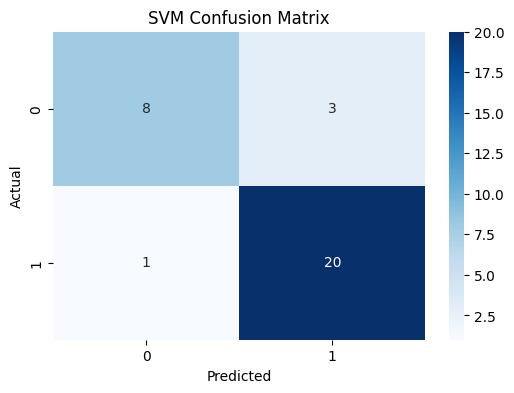

True Positives: 20
True Negatives: 8
False Positives: 1
False Negatives: 3


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# KNN SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# define params for tuning KNN by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 79.35131948925051


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=5, p=2, weights='uniform')
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=1)

In [ ]:
# get a prediction
y_hat = knn_improve_gridSearch.predict(X_train_sm)
y_knn = knn_improve_gridSearch.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train_sm, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  89.51612903225806
Test set accuracy:  81.25
Test set f1-score:  84.21052631578947
Test set precision:  94.11764705882352
Test set recall:  76.19047619047619


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.94      0.76      0.84        21

    accuracy                           0.81        32
   macro avg       0.80      0.84      0.81        32
weighted avg       0.85      0.81      0.82        32



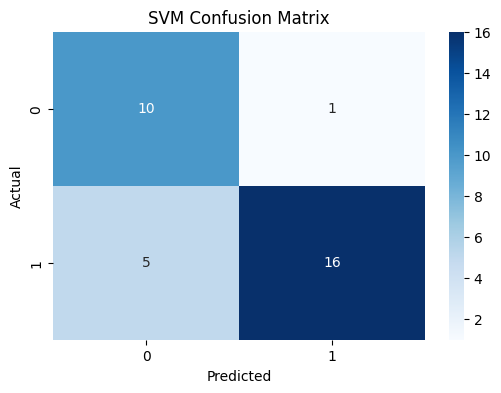

True Positives: 16
True Negatives: 10
False Positives: 5
False Negatives: 1


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# KNN ADS

In [ ]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X_ads, y_ads = ads.fit_resample(X, y)

In [ ]:
# define params for tuning KNN by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 77.2333589602524


# KNN TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# define params for tuning KNN by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 85.6063202030944


# KNN RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# define params for tuning KNN by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 87.09280303030302


# Predict Testing

In [ ]:
list_indikator = np.array(data_clean['indikator_stemmed_tokens'])
list_tipe = np.array(data_clean['type of encoding'])

In [ ]:
cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(list_indikator)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
X.shape

(126, 185)

In [ ]:
'''
Dataset baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
result = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
# model.fit(X_train,y_train)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])


In [ ]:
if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)



menolak nya, karena harus segera dikumpulkan 
The result is :  J


In [ ]:
y_test.value_counts()


In [ ]:
data_clean['Tipe'].value_counts()

# Saving model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
Dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []

sm = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
model.fit(X_train_sm, y_train_sm)

joblib.dump(model,'clf_T3.sav')

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)




menolak nya, karena harus segera dikumpulkan 
The result is :  J


# Load Model

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
# user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J
# user_input = "Saya akan mengatakan bahwasannya ingin menyelesaikan PR saya terlebih dahulu, dan akan menyusul apabila sudah selesai mengerjakannya." #J
# user_input = "Saya akan menyelesaikan terlebih dahulu tugas saya lalu menerima ajakan teman saya.. walau pertemuannya diundur beberapa jam." #J
# user_input = "Jika saya terganggu, saya akan minta maaf dan meminta waktu kepada dia agar saya bisa menyelesaikan tugas saya" #J
# user_input = "Saya akan menolaknya,karena ada tugas yang harus saya selesaikan hari itu juga" #J
# user_input = "Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri" #P

#P = 7 || N = 3

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []
model = joblib.load('clf_T3.sav')
y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)

Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri
The result is :  J


# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('C1.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# stop_list = ["saya","akan","yang","dan"]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_T1.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_T1.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# eval

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.metrics import f1_score
import joblib

# Load data X and y
X = joblib.load('X_T1.sav')
y = joblib.load('y_T1.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('C1.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []
ads = ADASYN()
X_ads, y_ads = ads.fit_resample(X, y)

# Train the model
model = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=7, p=2, weights='uniform')
model.fit(X_ads, y_ads)
# Save the model
joblib.dump(model, 'clf_T2.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('J')
    else:
        result.append('P')

# Display the predictions
for i, res in enumerate(result):
    print(f"Data {i+1}: Prediksi = {res}")


Data 1: Prediksi = J
Data 2: Prediksi = P
Data 3: Prediksi = P
Data 4: Prediksi = J
Data 5: Prediksi = P
Data 6: Prediksi = J
Data 7: Prediksi = P
Data 8: Prediksi = J
Data 9: Prediksi = J
Data 10: Prediksi = J


In [ ]:
pd.DataFrame(label)

,Tipe
0,J
1,P
2,P
3,J
4,P
5,P
6,P
7,J
8,J
9,P


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,membuat jadwal
1,fleksibel tergantung pada situasi
2,cenderung lebih fleksibel
3,menyusun jadwal
4,cenderung lebih fleksibel
5,Tergantung dengan situasi
6,Lebih fleksibel bergantung pada situasi
7,Jadwal tersusun rapi
8,Lebih terjadwal namun jika situasi tidak memad...
9,Saya memilih fleksibel bergantung pada situasi...


# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_T1.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","akan","dan","dengan","yang","di","lalu","jika","secara"]

def stopword_removal (indikator) :
  filtering = stop_list
  x = []
  data = []
  def my_func(x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func, indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



gantung pada situasi akrena harus kumpul niat
fleksibel gantung situasi kalau baut jadwal nanti malah beranta tidak efisien
cenderung buat jadwal susun rapi untuk giat hari hari karena rasa lebih organisir bisa kelola waktu lebih efketif
cenderungmembuat jadwal susun karena rasa lebih organisir waktu namun juga fleksibel ada situasi tentu seperti acara dadak tugas desak
cenderung fleksibel karena terkadang jadwal sudah susun tidak cocok situasi
suka buat giat jadwal karena itu dapat tentu apa saja harus laku
rencana hal hari hari gantung pada situasi dari diri apakah bisa laku atau tidak gantung pada situasi alami
cara rencana giat hari hari lebih fleksibel gantung pada situasi karena hampir tiap hari giat laku tidak gantung pada waktu sehingga situasi beda
lebih ke fleksibel gantung pada situasi alas lebih cepat saja


In [ ]:
dt.to_csv('C1_prepro.csv',index=False)

# eval prepro test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from sklearn.metrics import f1_score
import joblib

# Load data X and y
X = joblib.load('X_T1.sav')
y = joblib.load('y_T1.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('C1_prepro.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

# Train the model
model = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=7, p=2, weights='uniform')
model.fit(X_rus, y_rus)
# Save the model
joblib.dump(model, 'clf_T1.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('J')
    else:
        result.append('P')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


P
P
J
P
J
J
P
P
P


In [ ]:
pd.DataFrame(label)

,Tipe
0,P
1,P
2,J
3,J
4,P
5,J
6,P
7,P
8,P


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,"['gantung', 'pada', 'situasi', 'akrena', 'haru..."
1,"['fleksibel', 'gantung', 'situasi', 'kalau', '..."
2,"['cenderung', 'buat', 'jadwal', 'susun', 'rapi..."
3,"['cenderungmembuat', 'jadwal', 'susun', 'karen..."
4,"['cenderung', 'fleksibel', 'karena', 'terkadan..."
5,"['suka', 'buat', 'giat', 'jadwal', 'karena', '..."
6,"['rencana', 'hal', 'hari', 'hari', 'gantung', ..."
7,"['cara', 'rencana', 'giat', 'hari', 'hari', 'l..."
8,"['lebih', 'ke', 'fleksibel', 'gantung', 'pada'..."
